In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

plt.style.use("classic")

$\text{삶의 만족도} = \theta_0 + \theta_1 \times \text{1인당\_GDP}$

여기서 $\theta_0 과 \theta_1$ 은 모델의 파라미터이다. 

---

#### $\hat{y} = \theta_0 + \theta_1 \times x_1 + \theta_2 \times x_2 + \cdots + \theta_n \times x_n$

- $\hat{y}$ 는 예측값이다.

- $n$ 은 특성의 수입니다.

- $x_i$ 는 $i$ 번째 특성값입니다.

- $\theta_j$ 는 $j$ 번째 모델 파라미터입니다. (편향 $\theta_0$ 과 특성 가중치 $\theta_1, \theta_2, \cdots, \theta_n$ 을 포함합니다)


#### 벡터 표현) $\hat{y} = h_\theta(\mathbf{x}) = \theta \cdot \mathbf{x}$

- $\theta$ 는 편향 $\theta_0$ 과 특성 가중치 $\theta_1, \theta_2, \cdots, \theta_n$ 을 포함하는 모델의 파라미터 벡터입니다.

- $\mathbf{x}$ 는 $x_0$ 에서 $x_n$ 까지 포함하는 샘플의 특성 벡터입니다. $x_0$ 는 항상 1입니다.

- $\theta \cdot \mathbf{x}$ 는 $\theta$ 와 $\mathbf{x}$ 의 점곱입니다. 이는 $\theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_n x_n$ 과 같습니다.

- $h_\theta$ 는 모델 파라미터 $\theta$ 를 사용한 가설 함수입니다.

---





### 점곱과 행렬곱의 구분

#### 행렬곱 : (n, m) * (m, l) = (n, l) 
- 결과값이 행렬
#### 접곱(스칼라곱, 점곱, 내적) = 두 벡터의 각 원소를 곱해 더한 값 
- 결과값이 스칼라인 것

### 참고
#### $a \cdot b = a^T b$
- $a$ 와 $b$ 는 둘 다 벡터입니다.

---




### 선형 회귀 모델의 훈련과정

#### 1. 모델 파라미터를 임의의 값으로 초기화
#### 2. 훈련 세트에 대한 모델의 예측값과 실제값의 오차를 계산
#### 3. 오차가 작아지는 방향으로 모델 파라미터를 조금씩 수정

---

### 선형 회귀 모델의 MSE(평균 제곱 오차) 비용 함수

#### $MSE(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T \mathbf{x}^{(i)} - y^{(i)})^2$

- $x^{(i)}$ 는 $i$ 번째 샘플의 전체 특성값을 담은 벡터입니다.

---



## 정규방정식

#### $\hat{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

- $\hat{\theta}$ 는 비용 함수를 최소화하는 $\theta$ 값입니다.

- $\mathbf{y}$ 는 $y^{(1)}$ 에서 $y^{(m)}$ 까지 포함하는 타깃 벡터입니다.

## 실험

### 무작위로 생성한 선형 데이터

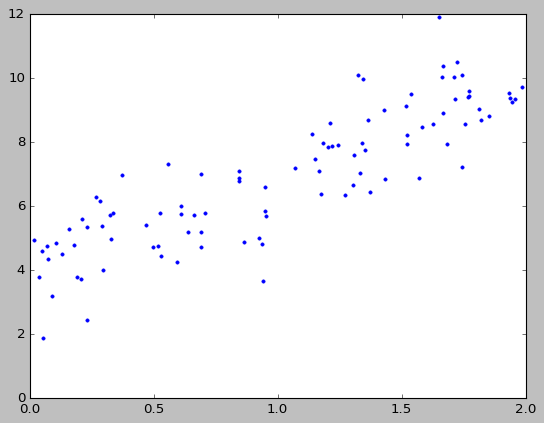

In [40]:
# 3x+4 + noise 를 데이터로 생성합니다.
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")

### 정규방정식을 사용한 선형회귀


In [41]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[3.88215929],
       [2.97180425]])

In [42]:
# 새로운 샘플에 대한 예측
X_new = np.array([[0],[2],[4]])
X_new_b = np.c_[np.ones((3,1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best) 
y_predict

array([[ 3.88215929],
       [ 9.8257678 ],
       [15.76937631]])

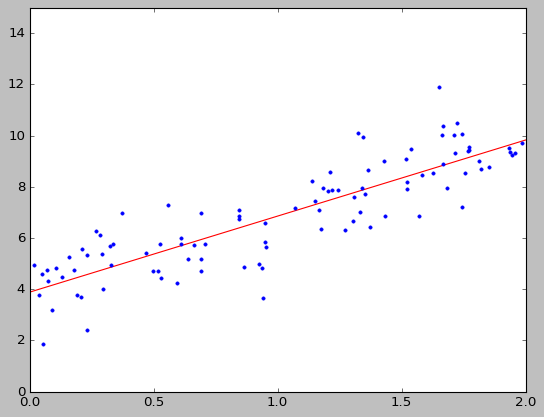

In [43]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

### 사이킷런을 이용한 선형 회귀

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("학습된 가중치와 절편 :")
print(lin_reg.intercept_, lin_reg.coef_, end="\n\n")
print("새로운 샘플에 대한 예측 :")
print(lin_reg.predict(X_new))

학습된 가중치와 절편 :
[3.88215929] [[2.97180425]]

새로운 샘플에 대한 예측 :
[[ 3.88215929]
 [ 9.8257678 ]
 [15.76937631]]


### 계산복잡도

#### 정규방정식

- 특성 수에 따라서는 역행렬을 계산하는데 걸리는 시간이 $O(n^{2.4})$ 에서 $O(n^3)$ 사이입니다.

#### 사이킷런으로 선형 회귀 수행

- SVD(특이값 분해) 방법은 $O(n^2)$ 입니다.

---

# 경사 하강법

## 배치 경사 하강법


### 비용함수의 편도함수

- $\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^T \mathbf{x}^{(i)} - y^{(i)}) x_j^{(i)}$

### 비용함수의 그레이디언트 벡터

- $\nabla_\theta MSE(\theta) = \begin{pmatrix} \frac{\partial}{\partial \theta_0} MSE(\theta) \\ \frac{\partial}{\partial \theta_1} MSE(\theta) \\ \vdots \\ \frac{\partial}{\partial \theta_n} MSE(\theta) \end{pmatrix} = \frac{2}{m} \mathbf{X}^T (\mathbf{X} \theta - \mathbf{y})$

### 경사 하강법의 스텝

- $\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)$

---

### 경사하강법 구현

In [45]:

eta = 0.1 # 학습률
n_iterations = 1000
m = 100 

theta = np.random.randn(2,1) # 무작위 초기화

for iterations in range(n_iterations) :
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[3.88215929]
 [2.97180425]]


---

## 확률적 경사 하강법

- 배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용하여 그레이디언트를 계산합니다. 이와 달리 확률적 경사 하강법은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하여 그레이디언트를 계산합니다.

### 배치 경사 하강법과 확률적 경사 하강법의 비교

### 확률적 경사 하강법의 장점

- 매우 큰 훈련 세트를 다룰 수 있습니다.

- 훈련이 매우 빠릅니다.

- 비용함수가 불규칙적일 경우 지역 최솟값을 건너뛸 가능성이 높습니다. (불안전성 때문)

### 확률적 경사 하강법의 단점

- 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정합니다.

- 비용 함수가 최솟값에 다다르면 훈련을 중지해야 합니다.


### 학습 스케줄

- 확률적 경사하강법에서는 비용함수가 최솟값에 안착하는게 불안정적이므로 학습률을 점진적으로 줄이는 기법을 사용합니다. 이때 학습률을 결정하는 함수를 학습 스케줄이라고 합니다.

### 학습 스케쥴을 사용한 확률적 경사 하강법의 구현


In [46]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t) :
    return t0 / (t + t1)

for epoch in range(n_epochs) :
    for i in range(m) : 
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        y1 = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - y1)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
print(theta)
        
        

[[3.82502735]
 [2.95307839]]


### 사이킷런을 이용한 확률적 경사하강법

In [47]:
from sklearn.linear_model import SGDRegressor
# epoch = 최대 1000번, 최소 손실률 = 1e-3, 규제 없음, 학습률 = 0.1(기본 학습 스키쥴을 사용)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.86381892] [2.96136156]


## 미니 배치 경사 하강법

- 미니 배치 경사 하강법은 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 미니 배치라고 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산합니다.

### 선형 회귀를 사용한 알고리즘 비교

- 정규방정식 : $\mathbf{X}^T \mathbf{X}$ 의 역행렬을 계산해야 하므로 특성 수가 많아지면 역행렬을 계산하는데 시간이 오래 걸립니다.

- SVD : 특성 수에 따라 계산복잡도가 $O(n^2)$ 에서 $O(n^3)$ 사이입니다.

- 배치 경사 하강법 : 특성 수에 민감하지 않지만 훈련 세트가 커지면 매우 느려집니다.

- 확률적 경사 하강법 : 훈련 세트가 커지면 훨씬 빠릅니다. 하지만 배치 경사 하강법보다 불안정합니다.

- 미니 배치 경사 하강법 : 배치 경사 하강법보다 빠르고 안정적입니다. 하지만 지역 최솟값에서 탈출하는 것이 더 힘듭니다.

---

# 다항 회귀

- 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있습니다. 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킵니다.

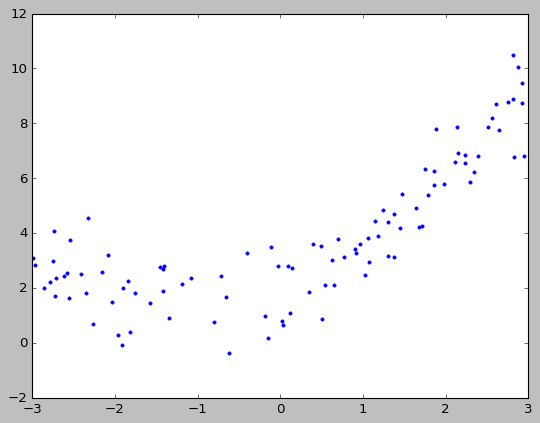

In [48]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X, y, "b.")

- 직선은 위 데이터와 잘 맞지 않습니다. 그러므로 특성을 추가하여 데이터를 변형시키는 것이 필요합니다. 여기서는 특성의 제곱을 새로운 특성으로 추가합니다.

- PolynomialFeatures 는 주어진 차수까지 특성 간의 모든 교차항을 추가합니다. 예를 들어 $a, b$ 두 개의 특성이 있으면 $degree=3$ 인 PolynomialFeatures 는 $1, a, b, a^2, ab, b^2, a^3, a^2b, ab^2, b^3$ 을 포함하는 새로운 특성을 만듭니다.

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[1.45267884]
[1.45267884 2.11027583]


In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.01991013] [[1.04010955 0.47164117]]


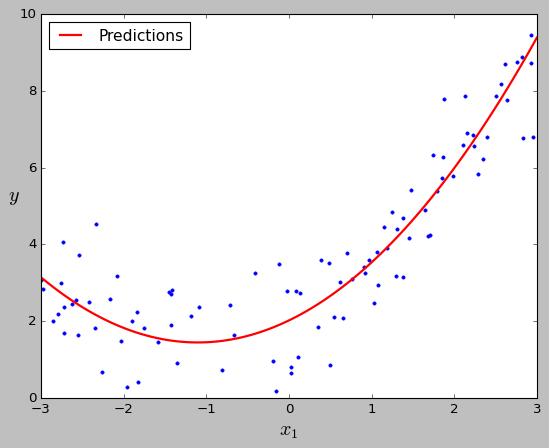

In [51]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) 
X_new_poly = poly_features.transform(X_new) 
y_new = lin_reg.predict(X_new_poly) 

plt.plot(X, y, "b.") 
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show() 


---
# 학습 곡선

- 과대적합인지 과소적합인지 판단하는데 도움을 줍니다.

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y) :
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)) :
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0, 80, 0, 3])
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

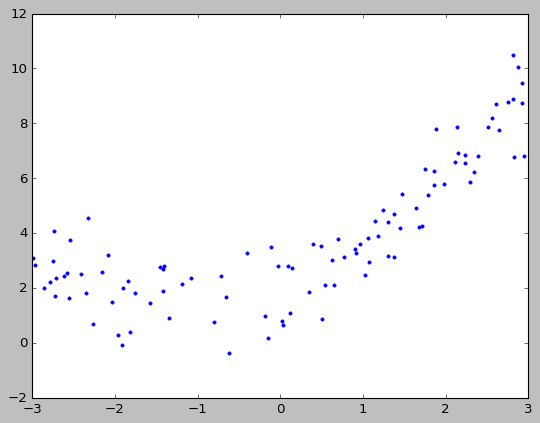

In [53]:
plt.plot(X,y,"b.")

### 선형 회귀에서의 학습 곡선

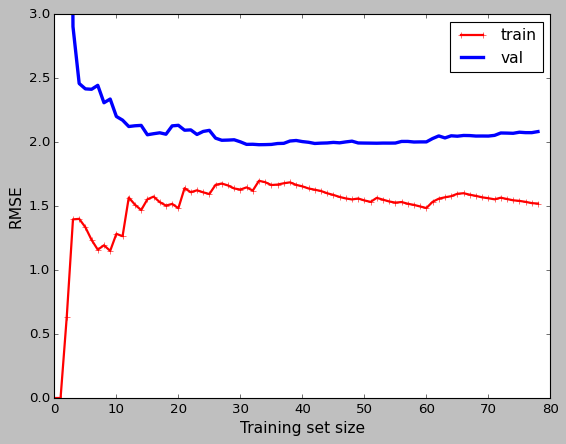

In [54]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### 다항 회귀에서의 학습 곡선 

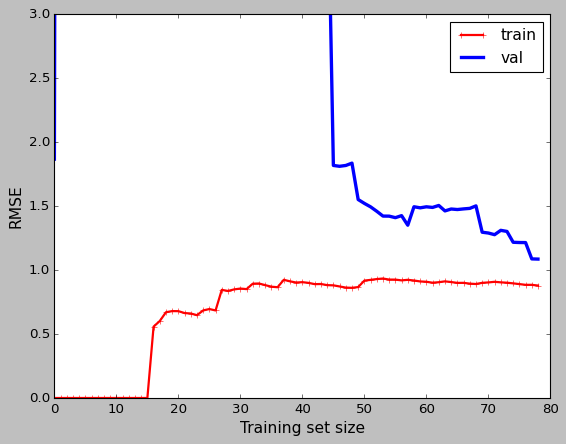

In [55]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

## 단항 회귀보다 다항 회귀에서의 차이점

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮습니다.

- 두 곡선 사이에 공간이 있습니다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징이빈다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워 집니다.

## 편향과 분산의 트레이드 오프

- 편향 : 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것입니다. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우입니다. 편향이 큰 모델은 훈련 데이터에 과소적합될 가능성이 높습니다.

- 분산 : 분산은 훈련 데이터의 작은 변동에 모델이 과도하게 민감한 것입니다. 자유도가 높은 모델(예를 들어 고차 다항 회귀 모델)은 높은 분산을 가집니다. 훈련 데이터를 더 많이 모으면 자유도가 높은 모델도 훈련 데이터에 과대적합되지 않습니다.

- 편향과 분산은 트레이드 오프 관계입니다. 편향이 높으면 분산이 낮고(과소적합), 분산이 높으면 편향이 낮습니다(과대적합).

---

# 규제가 있는 선형 모델

## 릿지 회귀

- 규제가 추가된 선형 회귀 버전입니다. 규제항 $\alpha \sum_{i=1}^{n} \theta_i^2$ 이 비용 함수에 추가됩니다. 이는 모델을 가능한 한 단순하게(기울기를 작게) 유지하려는 것을 의미합니다.

- 훈련이 끝나면 규제가 없는 성능 지표로 평가합니다.

### 릿지 회귀의 비용 함수

- $J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2$

### 주의

- 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 데이터 스케일을 맞추는 것이 중요합니다. 사이킷런의 StandardScaler 를 사용하면 편리합니다.

### 릿지 회귀의 정규방정식

- $\hat{\theta} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y}$

In [56]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.19211464]])

In [57]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.1730907])

## 라쏘 회귀

- 라쏘 회귀는 릿지 회귀처럼 비용 함수에 규제항을 더하지만, $l_1$ 규제를 사용합니다.

### 라쏘 회귀의 비용 함수

- $J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|$

- 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 완전히 제거하려고 한다는 것입니다. (즉, 가중치가 0이 됩니다.)

In [58]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.15742393])

## 엘라스틱넷

- 릿지 회귀와 라쏘 회귀를 절충한 모델입니다. 규제항은 릿지와 라쏘의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 $r$ 을 사용해 조절합니다.

### 엘라스틱넷의 비용 함수

- $J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2$

### 비교
- 릿지가 기본이 되지만 쓰이는 특성이 몇개 뿐이라고 의심되면 라쏘나 엘라스틱 넷이 낫습니다.

- 특성 수가 훈련 샘플 수보다 많거나 특성 몇개가 강하게 연관되어 있을 때는 라쏘보다는 엘라스틱 넷을 선호합니다.

In [59]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.15765236])

## 조기 종료



- 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것입니다.

In [60]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=0, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000) :
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error :
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
    
print(minimum_val_error)
print(best_epoch)
print(best_model)

/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before converg

0.78844684597978
289
SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=0, warm_start=True)


/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

---

# 로지스틱 회귀

- 샘플이 특정 클래스에 속할 확률을 추정하는데 사용됩니다.

- 분류에 사용되는 회귀 알고리즘입니다.

## 확률 추정

- 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산하고, 그 결과값의 로지스틱을 출력합니다.

### 로지스틱 회귀 모델의 확률 추정

- $\hat{p} = h_\theta(\mathbf{x}) = \sigma(\theta^T \mathbf{x})$

- (로지스틱) $\sigma(\cdot)$ 는 시그모이드 함수입니다.

### 로지스틱 함수

- $\sigma(t) = \frac{1}{1 + \exp(-t)}$

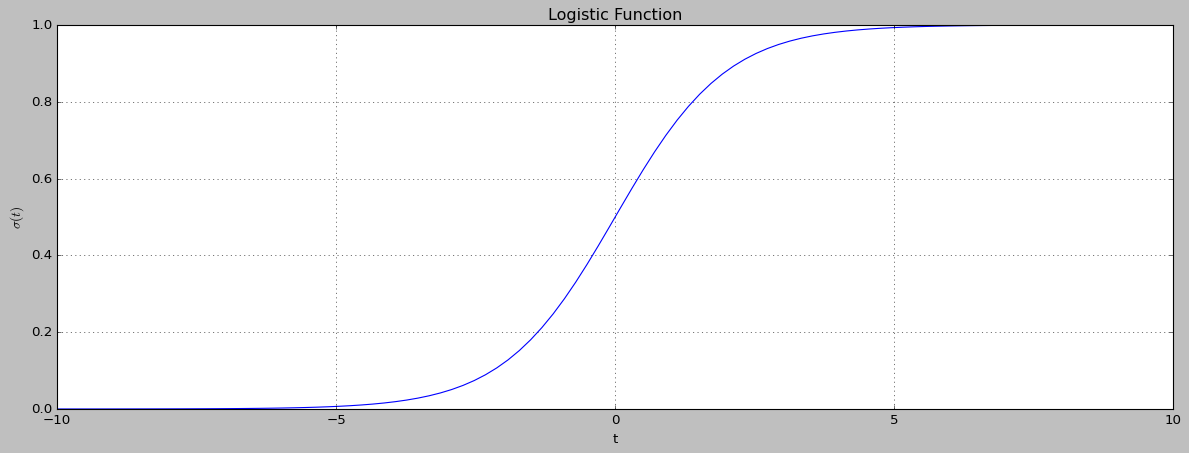

In [61]:
# 로지스틱 함수

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = logistic_function(x)

plt.figure(figsize=(18, 6))
plt.plot(x, y)
plt.title('Logistic Function')
plt.xlabel('t')
plt.ylabel('$\sigma(t)$')
plt.grid(True)
plt.show()

### 로지스틱 회귀 모델 예측

- $\hat{y} = \begin{cases} 0 & \text{if} \quad \hat{p} < 0.5 \\ 1 & \text{if} \quad \hat{p} \ge 0.5 \end{cases}$

- t < 0 이면 $\sigma(t) < 0.5$ 이고, t >= 0 이면 $\sigma(t) >= 0.5$ 이므로 로지스틱 회귀 모델은 입력 특성의 가중치 합이 양수일 때 1, 음수일 때 0을 예측합니다.

## 훈련과 비용 함수

### 하나의 훈련 샘플에 대한 비용 함수

- $c(\theta) = \begin{cases} -\log(\hat{p}) & \text{if} \quad y = 1 \\ -\log(1 - \hat{p}) & \text{if} \quad y = 0 \end{cases}$

- $-\log(t)$ 는 $t$ 가 0 에 가까워지면 아주 큰 값으로 수렴하고, $t$ 가 1 에 가까워지면 0 에 가까워집니다. 따라서 타깃이 1일 때 $\hat{p}$ 가 0에 가까워지면 비용이 아주 커지고, $\hat{p}$ 가 1에 가까워지면 0에 가까워집니다. 반대로 타깃이 0이고 $\hat{p}$ 가 0에 가까워지면 비용은 0에 가까워지고, $\hat{p}$ 가 1에 가까워지면 아주 큰 값으로 수렴합니다.

### 로지스틱 회귀 비용 함수(로그 손실)

- $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})]$

- 이 비용 함수의 최솟값을 계산하는 알려진 해가 없습니다. 하지만 이 비용 함수는 볼록 함수이므로 경사 하강법이 전역 최솟값을 찾는 것을 보장합니다.

### 로지스틱 비용 함수의 편도함수

- $\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\sigma(\theta^T \mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}$


## 결정 경계

In [62]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [63]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

<ipython-input-63-f4eeb5a2ba64>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [64]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

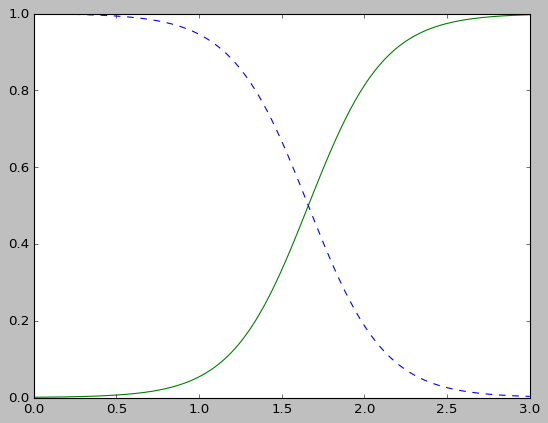

In [65]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [66]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

- 다른 선형 모델처럼 로지스틱 회귀 모델도 $ l_1 , l_2 $ 페널티를 사용하여 규제할 수 있습니다. 사이킷런은 $ l_2 $ 페널티를 기본으로 합니다.

## 소프트맥스 회귀

- 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지웒할 수 있습니다. 이를 소프트맥스 회귀 또는 다항 로지스틱 회귀라고 합니다.

- 샘플 $\mathbf{x}$ 가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 $k$ 에 대한 점수 $s_k(\mathbf{x})$ 를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정합니다.

### 클래스 k에 대한 소프트맥스 점수

- $s_k(\mathbf{x}) = (\theta^{(k)})^T \mathbf{x}$

- 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$ 를 가집니다. 이 벡터들은 파라미터 행렬 $\Theta$ 에 행으로 저장됩니다.

### 소프트맥스 함수

- $\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))}$

- $K$ 는 클래스 수입니다.

- $s(\mathbf{x})$ 는 샘플 $\mathbf{x}$ 에 대한 각 클래스의 점수를 담고 있는 벡터입니다.

- $\sigma(\mathbf{s}(\mathbf{x}))_k$ 는 샘플 $\mathbf{x}$ 에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 $k$ 에 속할 추정 확률입니다.

### 소프트맥스 회귀 분류기의 예측

- $\hat{y} = \underset{k}{\text{argmax}} \sigma(\mathbf{s}(\mathbf{x}))_k = \underset{k}{\text{argmax}} s_k(\mathbf{x}) = \underset{k}{\text{argmax}} ((\theta^{(k)})^T \mathbf{x})$

### 크로스 엔트로피 비용 함수

- $J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)})$

- $y_k^{(i)}$ 는 타깃 클래스가 $k$ 일 때 $i$ 번째 샘플의 타깃 확률입니다.

### 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터

- $\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_k^{(i)} - y_k^{(i)}) \mathbf{x}^{(i)}$